In [1]:
import pandas as pd
import numpy as np

import requests
from bs4 import BeautifulSoup

import nltk

pd.set_option("display.max_colwidth", -1)

/var/folders/pk/f_w9xjw57l3_b9hlyplw1pym0000gn/T/ipykernel_16251/3740272074.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


In [2]:
url = 'https://dk.trustpilot.com/review/www.sunset-boulevard.dk'

page = requests.get(url)

soup = BeautifulSoup(page.content, "html.parser")

In [3]:
class_review = 'typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn'
job_elements_2 = soup.find_all('p', class_ = class_review)

review = [tag.text.strip() for tag in job_elements_2]

In [107]:
df = pd.DataFrame(review, columns=['review'])
df.shape

(20, 1)

In [108]:
df_1 = (
    df
    .assign(
        text = lambda x: x.review.str.lower()
    )
)

df_1.head(20)

,review,text
0,"Har betalt for deres plus abonoment, som jeg ikke har kunne benyttet fordi deres sytem (app og hjemmesid) ikke er optimeret ordentligt. Har betalt for 20 dage uden grund, og kundeservice hjælper ikke på nogen måder. Dårlig kundeservice, især hvis i ville have jeres kunder til at fortsætte på jeres abonoment system.","har betalt for deres plus abonoment, som jeg ikke har kunne benyttet fordi deres sytem (app og hjemmesid) ikke er optimeret ordentligt. har betalt for 20 dage uden grund, og kundeservice hjælper ikke på nogen måder. dårlig kundeservice, især hvis i ville have jeres kunder til at fortsætte på jeres abonoment system."
1,"Køkkenet sejler. Der er ulækkert og beskidt over det hele. Damen i køkkenet bruger en klud, som ikke har været skiftet i mange timer.","køkkenet sejler. der er ulækkert og beskidt over det hele. damen i køkkenet bruger en klud, som ikke har været skiftet i mange timer."
2,"Mage til skrald service skal man da lede længe efter, i ville simpelhen ikke udlevere et sugerør så min 2 årig dreng som ikke er særlig god til og drikke af glas kunne drikke.","mage til skrald service skal man da lede længe efter, i ville simpelhen ikke udlevere et sugerør så min 2 årig dreng som ikke er særlig god til og drikke af glas kunne drikke."
3,"hvor svært kan det seriøst være at udlevere friske fritter, det er seriøst hver gang, og der er altid fejl i bestillingen, der mangler altid noget! og hvad er der blevet af kundeservice? og da jeg i sin tid arbejdede på sunset der præsenterede vi da os selv når vi tog telefonen, det måske yt nu ? og kvaliteten er virkelig blevet dårlig. der er tale om sunset i vejle","hvor svært kan det seriøst være at udlevere friske fritter, det er seriøst hver gang, og der er altid fejl i bestillingen, der mangler altid noget! og hvad er der blevet af kundeservice? og da jeg i sin tid arbejdede på sunset der præsenterede vi da os selv når vi tog telefonen, det måske yt nu ? og kvaliteten er virkelig blevet dårlig. der er tale om sunset i vejle"
4,Begrænset udvalg . Ville have en af jeres Hereford burger men skal åbenbart til Odense eller Nyborg . Kunne være i skulle skilte med det i Svendborg begrænset udvalg meget skuffet når vi nu har fået en Sunset i Svendborg,begrænset udvalg . ville have en af jeres hereford burger men skal åbenbart til odense eller nyborg . kunne være i skulle skilte med det i svendborg begrænset udvalg meget skuffet når vi nu har fået en sunset i svendborg
5,"Jeg har haft mange dejlige oplevelser på jeres lokation.Jeres sodavandsmaskine er yderst belejlig når man foretrækker at kombinere smagsoplevelserne, og i har et rart personale.Jeg må desværre tage en stjerne fra jer, da jeg har haft ét dårligt besøg hvor i ikke kunne tage i mod betalinger og jeg som kunde var nødsaget, at agere konsulent for jeres medarbejdere den pågældende dag, for at få min mad","jeg har haft mange dejlige oplevelser på jeres lokation.jeres sodavandsmaskine er yderst belejlig når man foretrækker at kombinere smagsoplevelserne, og i har et rart personale.jeg må desværre tage en stjerne fra jer, da jeg har haft ét dårligt besøg hvor i ikke kunne tage i mod betalinger og jeg som kunde var nødsaget, at agere konsulent for jeres medarbejdere den pågældende dag, for at få min mad"
6,"Bestilte lidt mad til nogle som ikke spiser svinekød, så det skulle være uden bacon. Der var bacon i, og sh** happens. Ringer for at få pengene tilbage fra ordren, da den alligevel bare røg ud. Kundeservice siger de hurtigt vil vende tilbage, har nu forsøgt at gen besvare den mail flere gange, men høre aldrig fra dem igen - fed service …","bestilte lidt mad til nogle som ikke spiser svinekød, så det skulle være uden bacon. der var bacon i, og sh** happens. ringer for at få pengene tilbage fra ordren, da den alligevel bare røg ud. kundeservice siger de hurtigt vil vende tilbage, har nu forsøgt at gen besvare den mail flere gange, men høre aldrig fra dem igen - fed service …"
7,Jeg har spurgt hver eneste ug

In [197]:
regexp = nltk.RegexpTokenizer(r'(?:\[[^][]*]|\s)+', gaps=True)

,review,text,text_token,text_token_stop,text_string,text_token_lem
0,"Har betalt for deres plus abonoment, som jeg ikke har kunne benyttet fordi deres sytem (app og hjemmesid) ikke er optimeret ordentligt. Har betalt for 20 dage uden grund, og kundeservice hjælper ikke på nogen måder. Dårlig kundeservice, især hvis i ville have jeres kunder til at fortsætte på jeres abonoment system.","har betalt for deres plus abonoment, som jeg ikke har kunne benyttet fordi deres sytem (app og hjemmesid) ikke er optimeret ordentligt. har betalt for 20 dage uden grund, og kundeservice hjælper ikke på nogen måder. dårlig kundeservice, især hvis i ville have jeres kunder til at fortsætte på jeres abonoment system.","[har, betalt, for, deres, plus, abonoment,, som, jeg, ikke, har, kunne, benyttet, fordi, deres, sytem, (app, og, hjemmesid), ikke, er, optimeret, ordentligt., har, betalt, for, 20, dage, uden, grund,, og, kundeservice, hjælper, ikke, på, nogen, måder., dårlig, kundeservice,, især, hvis, i, ville, have, jeres, kunder, til, at, fortsætte, på, jeres, abonoment, system.]","[betalt, plus, abonoment,, benyttet, sytem, (app, hjemmesid), optimeret, ordentligt., betalt, 20, dage, uden, grund,, kundeservice, hjælper, nogen, måder., dårlig, kundeservice,, især, kunder, fortsætte, abonoment, system.]","betalt plus abonoment, benyttet sytem (app hjemmesid) optimeret ordentligt. betalt dage uden grund, kundeservice hjælper nogen måder. dårlig kundeservice, især kunder fortsætte abonoment system.","betalt plus abonoment, benyttet sytem (app hjemmesid) optimeret ordentligt. betalt dage uden grund, kundeservice hjælper nogen måder. dårlig kundeservice, især kunder fortsætte abonoment system."


In [112]:
regexp = nltk.RegexpTokenizer('\w+|\$[\d\.]+|\S+', gaps=True)

df_2 = (
    df_1
    .assign(
        text_token = lambda x: x['text'].apply(regexp.tokenize)
    )
)

df_2.head(2)

,review,text,text_token
0,"Har betalt for deres plus abonoment, som jeg ikke har kunne benyttet fordi deres sytem (app og hjemmesid) ikke er optimeret ordentligt. Har betalt for 20 dage uden grund, og kundeservice hjælper ikke på nogen måder. Dårlig kundeservice, især hvis i ville have jeres kunder til at fortsætte på jeres abonoment system.","har betalt for deres plus abonoment, som jeg ikke har kunne benyttet fordi deres sytem (app og hjemmesid) ikke er optimeret ordentligt. har betalt for 20 dage uden grund, og kundeservice hjælper ikke på nogen måder. dårlig kundeservice, især hvis i ville have jeres kunder til at fortsætte på jeres abonoment system.","[har, betalt, for, deres, plus, abonoment, ,, som, jeg, ikke, har, kunne, benyttet, fordi, deres, sytem, (app, og, hjemmesid, ), ikke, er, optimeret, ordentligt, ., har, betalt, for, 20, dage, uden, grund, ,, og, kundeservice, hjælper, ikke, på, nogen, måder, ., dårlig, kundeservice, ,, især, hvis, i, ville, have, jeres, kunder, til, at, fortsætte, på, jeres, abonoment, system, .]"
1,"Køkkenet sejler. Der er ulækkert og beskidt over det hele. Damen i køkkenet bruger en klud, som ikke har været skiftet i mange timer.","køkkenet sejler. der er ulækkert og beskidt over det hele. damen i køkkenet bruger en klud, som ikke har været skiftet i mange timer.","[køkkenet, sejler, ., der, er, ulækkert, og, beskidt, over, det, hele, ., damen, i, køkkenet, bruger, en, klud, ,, som, ikke, har, været, skiftet, i, mange, timer, .]"


In [113]:
nltk.corpus.stopwords.words('danish')

['og',
 'i',
 'jeg',
 'det',
 'at',
 'en',
 'den',
 'til',
 'er',
 'som',
 'på',
 'de',
 'med',
 'han',
 'af',
 'for',
 'ikke',
 'der',
 'var',
 'mig',
 'sig',
 'men',
 'et',
 'har',
 'om',
 'vi',
 'min',
 'havde',
 'ham',
 'hun',
 'nu',
 'over',
 'da',
 'fra',
 'du',
 'ud',
 'sin',
 'dem',
 'os',
 'op',
 'man',
 'hans',
 'hvor',
 'eller',
 'hvad',
 'skal',
 'selv',
 'her',
 'alle',
 'vil',
 'blev',
 'kunne',
 'ind',
 'når',
 'være',
 'dog',
 'noget',
 'ville',
 'jo',
 'deres',
 'efter',
 'ned',
 'skulle',
 'denne',
 'end',
 'dette',
 'mit',
 'også',
 'under',
 'have',
 'dig',
 'anden',
 'hende',
 'mine',
 'alt',
 'meget',
 'sit',
 'sine',
 'vor',
 'mod',
 'disse',
 'hvis',
 'din',
 'nogle',
 'hos',
 'blive',
 'mange',
 'ad',
 'bliver',
 'hendes',
 'været',
 'thi',
 'jer',
 'sådan']

In [148]:
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("danish")

my_stopwords = ['sunset', 'mad', 'kan', 'ved', 'jeres', 'igen', 'fik', '!', 'tilbage', 'gang', 'siger', 'flere', 'gange','!', 'maden', 'lave',  'fordi']
stopwords.extend(my_stopwords)


In [149]:
df_3 = (
    df_2
    .assign(
        text_token_stop = lambda x: 
            x['text_token']
            .apply(
                lambda xx: [item for item in xx if item not in stopwords])
    )
)

df_3.head(2)

,review,text,text_token,text_token_stop
0,"Har betalt for deres plus abonoment, som jeg ikke har kunne benyttet fordi deres sytem (app og hjemmesid) ikke er optimeret ordentligt. Har betalt for 20 dage uden grund, og kundeservice hjælper ikke på nogen måder. Dårlig kundeservice, især hvis i ville have jeres kunder til at fortsætte på jeres abonoment system.","har betalt for deres plus abonoment, som jeg ikke har kunne benyttet fordi deres sytem (app og hjemmesid) ikke er optimeret ordentligt. har betalt for 20 dage uden grund, og kundeservice hjælper ikke på nogen måder. dårlig kundeservice, især hvis i ville have jeres kunder til at fortsætte på jeres abonoment system.","[har, betalt, for, deres, plus, abonoment, ,, som, jeg, ikke, har, kunne, benyttet, fordi, deres, sytem, (app, og, hjemmesid, ), ikke, er, optimeret, ordentligt, ., har, betalt, for, 20, dage, uden, grund, ,, og, kundeservice, hjælper, ikke, på, nogen, måder, ., dårlig, kundeservice, ,, især, hvis, i, ville, have, jeres, kunder, til, at, fortsætte, på, jeres, abonoment, system, .]","[betalt, plus, abonoment, ,, benyttet, sytem, (app, hjemmesid, ), optimeret, ordentligt, ., betalt, 20, dage, uden, grund, ,, kundeservice, hjælper, nogen, måder, ., dårlig, kundeservice, ,, især, kunder, fortsætte, abonoment, system, .]"
1,"Køkkenet sejler. Der er ulækkert og beskidt over det hele. Damen i køkkenet bruger en klud, som ikke har været skiftet i mange timer.","køkkenet sejler. der er ulækkert og beskidt over det hele. damen i køkkenet bruger en klud, som ikke har været skiftet i mange timer.","[køkkenet, sejler, ., der, er, ulækkert, og, beskidt, over, det, hele, ., damen, i, køkkenet, bruger, en, klud, ,, som, ikke, har, været, skiftet, i, mange, timer, .]","[køkkenet, sejler, ., ulækkert, beskidt, hele, ., damen, køkkenet, bruger, klud, ,, skiftet, timer, .]"


In [150]:
df_4 = (
    df_3
    .assign(
        text_string = lambda x: 
            x['text_token_stop']
            .apply(lambda xx: ' '.join([item for item in xx if len(item) > 2]))
    )
)

df_4.head(10)

,review,text,text_token,text_token_stop,text_string
0,"Har betalt for deres plus abonoment, som jeg ikke har kunne benyttet fordi deres sytem (app og hjemmesid) ikke er optimeret ordentligt. Har betalt for 20 dage uden grund, og kundeservice hjælper ikke på nogen måder. Dårlig kundeservice, især hvis i ville have jeres kunder til at fortsætte på jeres abonoment system.","har betalt for deres plus abonoment, som jeg ikke har kunne benyttet fordi deres sytem (app og hjemmesid) ikke er optimeret ordentligt. har betalt for 20 dage uden grund, og kundeservice hjælper ikke på nogen måder. dårlig kundeservice, især hvis i ville have jeres kunder til at fortsætte på jeres abonoment system.","[har, betalt, for, deres, plus, abonoment, ,, som, jeg, ikke, har, kunne, benyttet, fordi, deres, sytem, (app, og, hjemmesid, ), ikke, er, optimeret, ordentligt, ., har, betalt, for, 20, dage, uden, grund, ,, og, kundeservice, hjælper, ikke, på, nogen, måder, ., dårlig, kundeservice, ,, især, hvis, i, ville, have, jeres, kunder, til, at, fortsætte, på, jeres, abonoment, system, .]","[betalt, plus, abonoment, ,, benyttet, sytem, (app, hjemmesid, ), optimeret, ordentligt, ., betalt, 20, dage, uden, grund, ,, kundeservice, hjælper, nogen, måder, ., dårlig, kundeservice, ,, især, kunder, fortsætte, abonoment, system, .]",betalt plus abonoment benyttet sytem (app hjemmesid optimeret ordentligt betalt dage uden grund kundeservice hjælper nogen måder dårlig kundeservice især kunder fortsætte abonoment system
1,"Køkkenet sejler. Der er ulækkert og beskidt over det hele. Damen i køkkenet bruger en klud, som ikke har været skiftet i mange timer.","køkkenet sejler. der er ulækkert og beskidt over det hele. damen i køkkenet bruger en klud, som ikke har været skiftet i mange timer.","[køkkenet, sejler, ., der, er, ulækkert, og, beskidt, over, det, hele, ., damen, i, køkkenet, bruger, en, klud, ,, som, ikke, har, været, skiftet, i, mange, timer, .]","[køkkenet, sejler, ., ulækkert, beskidt, hele, ., damen, køkkenet, bruger, klud, ,, skiftet, timer, .]",køkkenet sejler ulækkert beskidt hele damen køkkenet bruger klud skiftet timer
2,"Mage til skrald service skal man da lede længe efter, i ville simpelhen ikke udlevere et sugerør så min 2 årig dreng som ikke er særlig god til og drikke af glas kunne drikke.","mage til skrald service skal man da lede længe efter, i ville simpelhen ikke udlevere et sugerør så min 2 årig dreng som ikke er særlig god til og drikke af glas kunne drikke.","[mage, til, skrald, service, skal, man, da, lede, længe, efter, ,, i, ville, simpelhen, ikke, udlevere, et, sugerør, så, min, 2, årig, dreng, som, ikke, er, særlig, god, til, og, drikke, af, glas, kunne, drikke, .]","[mage, skrald, service, lede, længe, ,, simpelhen, udlevere, sugerør, så, 2, årig, dreng, særlig, god, drikke, glas, drikke, .]",mage skrald service lede længe simpelhen udlevere sugerør årig dreng særlig god drikke glas drikke
3,"hvor svært kan det seriøst være at udlevere friske fritter, det er seriøst hver gang, og der er altid fejl i bestillingen, der mangler altid noget! og hvad er der blevet af kundeservice? og da jeg i sin tid arbejdede på sunset der præsenterede vi da os selv når vi tog telefonen, det måske yt nu ? og kvaliteten er virkelig blevet dårlig. der er tale om sunset i vejle","hvor svært kan det seriøst være at udlevere friske fritter, det er seriøst hver gang, og der er altid fejl i bestillingen, der mangler altid noget! og hvad er der blevet af kundeservice? og da jeg i sin tid arbejdede på sunset der præsenterede vi da os selv når vi tog telefonen, det måske yt nu ? og kvaliteten er virkelig blevet dårlig. der er tale om sunset i vejle","[hvor, svært, kan, det, seriøst, være, at, udlevere, friske, fritter, ,, det, er, seriøst, hver, gang, ,, og, der, er, altid, fejl, i, bestillingen, ,, der, mangler, altid, noget, !, og, hvad, er, der, blevet, af, kundeservice, ?, og, da, jeg, i, sin, tid, arbejdede, på, sunset, der, præsenterede, vi, da, os, selv, n

In [151]:
# all word

all_words = ' '.join([word for word in df_4['text_string']])

tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [152]:
fdist = nltk.probability.FreqDist(tokenized_words)
fdist

FreqDist({'!': 13, 'kundeservice': 6, 'burgere': 6, 'bestilt': 6, 'god': 5, 'svendborg': 4, 'betalt': 3, 'ulækkert': 3, 'service': 3, 'altid': 3, ...})

In [153]:
df_5 = (
    df_4
    .assign(
        text_string_fdist = lambda x: 
            x['text_string']
            .apply(lambda xx: ' '.join([item for item in xx if fdist[item] >= 1 ]))
    )
)

df_5.head(2)

,review,text,text_token,text_token_stop,text_string,text_string_fdist
0,"Har betalt for deres plus abonoment, som jeg ikke har kunne benyttet fordi deres sytem (app og hjemmesid) ikke er optimeret ordentligt. Har betalt for 20 dage uden grund, og kundeservice hjælper ikke på nogen måder. Dårlig kundeservice, især hvis i ville have jeres kunder til at fortsætte på jeres abonoment system.","har betalt for deres plus abonoment, som jeg ikke har kunne benyttet fordi deres sytem (app og hjemmesid) ikke er optimeret ordentligt. har betalt for 20 dage uden grund, og kundeservice hjælper ikke på nogen måder. dårlig kundeservice, især hvis i ville have jeres kunder til at fortsætte på jeres abonoment system.","[har, betalt, for, deres, plus, abonoment, ,, som, jeg, ikke, har, kunne, benyttet, fordi, deres, sytem, (app, og, hjemmesid, ), ikke, er, optimeret, ordentligt, ., har, betalt, for, 20, dage, uden, grund, ,, og, kundeservice, hjælper, ikke, på, nogen, måder, ., dårlig, kundeservice, ,, især, hvis, i, ville, have, jeres, kunder, til, at, fortsætte, på, jeres, abonoment, system, .]","[betalt, plus, abonoment, ,, benyttet, sytem, (app, hjemmesid, ), optimeret, ordentligt, ., betalt, 20, dage, uden, grund, ,, kundeservice, hjælper, nogen, måder, ., dårlig, kundeservice, ,, især, kunder, fortsætte, abonoment, system, .]",betalt plus abonoment benyttet sytem (app hjemmesid optimeret ordentligt betalt dage uden grund kundeservice hjælper nogen måder dårlig kundeservice især kunder fortsætte abonoment system,(
1,"Køkkenet sejler. Der er ulækkert og beskidt over det hele. Damen i køkkenet bruger en klud, som ikke har været skiftet i mange timer.","køkkenet sejler. der er ulækkert og beskidt over det hele. damen i køkkenet bruger en klud, som ikke har været skiftet i mange timer.","[køkkenet, sejler, ., der, er, ulækkert, og, beskidt, over, det, hele, ., damen, i, køkkenet, bruger, en, klud, ,, som, ikke, har, været, skiftet, i, mange, timer, .]","[køkkenet, sejler, ., ulækkert, beskidt, hele, ., damen, køkkenet, bruger, klud, ,, skiftet, timer, .]",køkkenet sejler ulækkert beskidt hele damen køkkenet bruger klud skiftet timer,


In [154]:
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


In [155]:
df_5['text_string_lem'] = df_5['text_string'].apply(wordnet_lem.lemmatize)

df_5.head(2)

,review,text,text_token,text_token_stop,text_string,text_string_fdist,text_string_lem
0,"Har betalt for deres plus abonoment, som jeg ikke har kunne benyttet fordi deres sytem (app og hjemmesid) ikke er optimeret ordentligt. Har betalt for 20 dage uden grund, og kundeservice hjælper ikke på nogen måder. Dårlig kundeservice, især hvis i ville have jeres kunder til at fortsætte på jeres abonoment system.","har betalt for deres plus abonoment, som jeg ikke har kunne benyttet fordi deres sytem (app og hjemmesid) ikke er optimeret ordentligt. har betalt for 20 dage uden grund, og kundeservice hjælper ikke på nogen måder. dårlig kundeservice, især hvis i ville have jeres kunder til at fortsætte på jeres abonoment system.","[har, betalt, for, deres, plus, abonoment, ,, som, jeg, ikke, har, kunne, benyttet, fordi, deres, sytem, (app, og, hjemmesid, ), ikke, er, optimeret, ordentligt, ., har, betalt, for, 20, dage, uden, grund, ,, og, kundeservice, hjælper, ikke, på, nogen, måder, ., dårlig, kundeservice, ,, især, hvis, i, ville, have, jeres, kunder, til, at, fortsætte, på, jeres, abonoment, system, .]","[betalt, plus, abonoment, ,, benyttet, sytem, (app, hjemmesid, ), optimeret, ordentligt, ., betalt, 20, dage, uden, grund, ,, kundeservice, hjælper, nogen, måder, ., dårlig, kundeservice, ,, især, kunder, fortsætte, abonoment, system, .]",betalt plus abonoment benyttet sytem (app hjemmesid optimeret ordentligt betalt dage uden grund kundeservice hjælper nogen måder dårlig kundeservice især kunder fortsætte abonoment system,(,betalt plus abonoment benyttet sytem (app hjemmesid optimeret ordentligt betalt dage uden grund kundeservice hjælper nogen måder dårlig kundeservice især kunder fortsætte abonoment system
1,"Køkkenet sejler. Der er ulækkert og beskidt over det hele. Damen i køkkenet bruger en klud, som ikke har været skiftet i mange timer.","køkkenet sejler. der er ulækkert og beskidt over det hele. damen i køkkenet bruger en klud, som ikke har været skiftet i mange timer.","[køkkenet, sejler, ., der, er, ulækkert, og, beskidt, over, det, hele, ., damen, i, køkkenet, bruger, en, klud, ,, som, ikke, har, været, skiftet, i, mange, timer, .]","[køkkenet, sejler, ., ulækkert, beskidt, hele, ., damen, køkkenet, bruger, klud, ,, skiftet, timer, .]",køkkenet sejler ulækkert beskidt hele damen køkkenet bruger klud skiftet timer,,køkkenet sejler ulækkert beskidt hele damen køkkenet bruger klud skiftet timer


In [156]:
all_words_lem = ' '.join([word for word in df_5['text_string_lem']])
all_words_lem

'betalt plus abonoment benyttet sytem (app hjemmesid optimeret ordentligt betalt dage uden grund kundeservice hjælper nogen måder dårlig kundeservice især kunder fortsætte abonoment system køkkenet sejler ulækkert beskidt hele damen køkkenet bruger klud skiftet timer mage skrald service lede længe simpelhen udlevere sugerør årig dreng særlig god drikke glas drikke svært seriøst udlevere friske fritter seriøst hver altid fejl bestillingen mangler altid blevet kundeservice tid arbejdede præsenterede tog telefonen måske kvaliteten virkelig blevet dårlig tale vejle begrænset udvalg hereford burger åbenbart odense nyborg skilte svendborg begrænset udvalg skuffet fået svendborg haft dejlige oplevelser lokation .jeres sodavandsmaskine yderst belejlig foretrækker kombinere smagsoplevelserne rart personale .jeg desværre tage stjerne haft dårligt besøg tage betalinger kunde nødsaget agere konsulent medarbejdere pågældende dag bestilte lidt spiser svinekød uden bacon bacon happens ringer pengene 

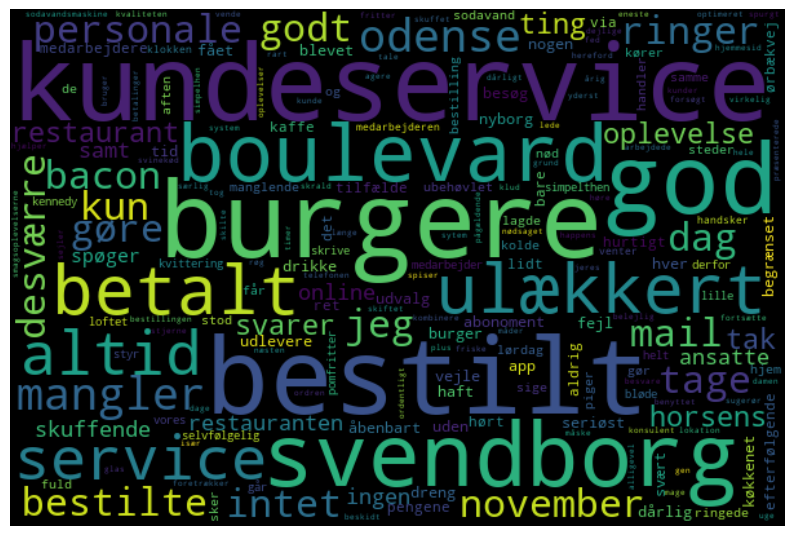

In [157]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

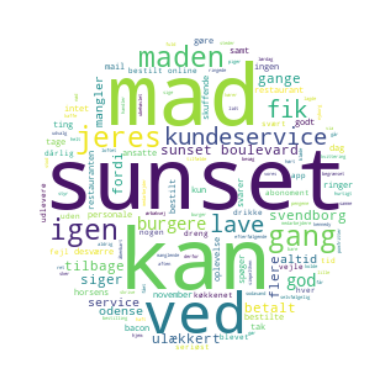

In [78]:
import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words_lem)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

In [79]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lucasbagge/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [158]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

In [159]:
fd.most_common(3)

[('!', 13), ('kundeservice', 6), ('burgere', 6)]

In [160]:
# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

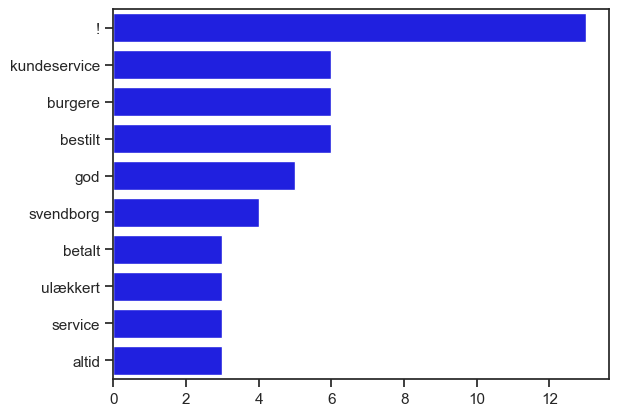

In [161]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');

In [162]:
import plotly.express as px

fig = px.bar(y=fdist.index, x=fdist.values)

# sort values
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

# show plot
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [163]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [164]:
df_5['polarity'] = df_5['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
df_5.tail(3)

,review,text,text_token,text_token_stop,text_string,text_string_fdist,text_string_lem,polarity
17,"Vi havde bestilt online ved Esbjerg storcenter. Vi havde bestilt maden til kl.17:40, men maden var først færdig 20 minutter senere… vi fik ikke det vi havde bestilt. Der var ikke bacon i vores snackwich, kolde og rå pomfritter og poserne var kun halv fyldt op samt resten af vores mad var kold, da vi kom hjem på trods af vi bor 2 min væk fra centeret. Jeg henvender mig ved salatbaren, hvor medarbejderen siger at sådan laves de efter i har fået nyt emballage. Medarbejderen var sur og svarede kunderne flabet igen. Der var ingen kundeservice!! Udover det var der ingen god hygiejne!! De brugte de samme handsker til at lave mad, gå ud med maden samt sætte bøffer og pommes over!!!","vi havde bestilt online ved esbjerg storcenter. vi havde bestilt maden til kl.17:40, men maden var først færdig 20 minutter senere… vi fik ikke det vi havde bestilt. der var ikke bacon i vores snackwich, kolde og rå pomfritter og poserne var kun halv fyldt op samt resten af vores mad var kold, da vi kom hjem på trods af vi bor 2 min væk fra centeret. jeg henvender mig ved salatbaren, hvor medarbejderen siger at sådan laves de efter i har fået nyt emballage. medarbejderen var sur og svarede kunderne flabet igen. der var ingen kundeservice!! udover det var der ingen god hygiejne!! de brugte de samme handsker til at lave mad, gå ud med maden samt sætte bøffer og pommes over!!!","[vi, havde, bestilt, online, ved, esbjerg, storcenter, ., vi, havde, bestilt, maden, til, kl, .17:40,, men, maden, var, først, færdig, 20, minutter, senere, …, vi, fik, ikke, det, vi, havde, bestilt, ., der, var, ikke, bacon, i, vores, snackwich, ,, kolde, og, rå, pomfritter, og, poserne, var, kun, halv, fyldt, op, samt, resten, af, vores, mad, var, kold, ,, da, vi, kom, hjem, på, trods, af, vi, bor, 2, min, væk, fra, centeret, ., jeg, henvender, mig, ved, salatbaren, ,, hvor, medarbejderen, siger, at, sådan, laves, de, efter, i, har, fået, nyt, emballage, ., medarbejderen, var, sur, og, svarede, kunderne, ...]","[bestilt, online, esbjerg, storcenter, ., bestilt, kl, .17:40,, først, færdig, 20, minutter, senere, …, bestilt, ., bacon, vores, snackwich, ,, kolde, rå, pomfritter, poserne, kun, halv, fyldt, samt, resten, vores, kold, ,, kom, hjem, trods, bor, 2, væk, centeret, ., henvender, salatbaren, ,, medarbejderen, laves, fået, nyt, emballage, ., medarbejderen, sur, svarede, kunderne, flabet, ., ingen, kundeservice, !!, udover, ingen, god, hygiejne, !!, brugte, samme, handsker, ,, gå, samt, sætte, bøffer, pommes, !!!]","bestilt online esbjerg storcenter bestilt .17:40, først færdig minutter senere bestilt bacon vores snackwich kolde pomfritter poserne kun halv fyldt samt resten vores kold kom hjem trods bor væk centeret henvender salatbaren medarbejderen laves fået nyt emballage medarbejderen sur svarede kunderne flabet ingen kundeservice udover ingen god hygiejne brugte samme handsker samt sætte bøffer pommes !!!",": , ! ! !","bestilt online esbjerg storcenter bestilt .17:40, først færdig minutter senere bestilt bacon vores snackwich kolde pomfritter poserne kun halv fyldt samt resten vores kold kom hjem trods bor væk centeret henvender salatbaren medarbejderen laves fået nyt emballage medarbejderen sur svarede kunderne flabet ingen kundeservice udover ingen god hygiejne brugte samme handsker samt sætte bøffer pommes !!!","{'neg': 0.0, 'neu': 0.949, 'pos': 0.051, 'compound': 0.4545}"
18,"Der spilles alt alt for højt musik i Sunset Boulevard på Dandyvej 1 i Vejle og sådan har det desværre været alle de gange jeg har været der. De ansatte bliver nød til at råbe til hinanden og man kan ikke føre en normal samtale eller tænke en rationel tanke. Jeg endte med at tage min mad med mig og spiste den i bilen på p-pladsen ved dette besøg, da der simpelthen var alt for meget larm i restauranten. Skuffende at man ikke kan sige og spise sin mad.","der spilles alt alt for højt musik i sunset boulev

In [165]:
df_6 = pd.concat(
    [df_5, 
     df_5['polarity'].apply(pd.Series)], axis=1)
df_6.head(3)

,review,text,text_token,text_token_stop,text_string,text_string_fdist,text_string_lem,polarity,neg,neu,pos,compound
0,"Har betalt for deres plus abonoment, som jeg ikke har kunne benyttet fordi deres sytem (app og hjemmesid) ikke er optimeret ordentligt. Har betalt for 20 dage uden grund, og kundeservice hjælper ikke på nogen måder. Dårlig kundeservice, især hvis i ville have jeres kunder til at fortsætte på jeres abonoment system.","har betalt for deres plus abonoment, som jeg ikke har kunne benyttet fordi deres sytem (app og hjemmesid) ikke er optimeret ordentligt. har betalt for 20 dage uden grund, og kundeservice hjælper ikke på nogen måder. dårlig kundeservice, især hvis i ville have jeres kunder til at fortsætte på jeres abonoment system.","[har, betalt, for, deres, plus, abonoment, ,, som, jeg, ikke, har, kunne, benyttet, fordi, deres, sytem, (app, og, hjemmesid, ), ikke, er, optimeret, ordentligt, ., har, betalt, for, 20, dage, uden, grund, ,, og, kundeservice, hjælper, ikke, på, nogen, måder, ., dårlig, kundeservice, ,, især, hvis, i, ville, have, jeres, kunder, til, at, fortsætte, på, jeres, abonoment, system, .]","[betalt, plus, abonoment, ,, benyttet, sytem, (app, hjemmesid, ), optimeret, ordentligt, ., betalt, 20, dage, uden, grund, ,, kundeservice, hjælper, nogen, måder, ., dårlig, kundeservice, ,, især, kunder, fortsætte, abonoment, system, .]",betalt plus abonoment benyttet sytem (app hjemmesid optimeret ordentligt betalt dage uden grund kundeservice hjælper nogen måder dårlig kundeservice især kunder fortsætte abonoment system,(,betalt plus abonoment benyttet sytem (app hjemmesid optimeret ordentligt betalt dage uden grund kundeservice hjælper nogen måder dårlig kundeservice især kunder fortsætte abonoment system,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0,1.00,0.00,0.0000
1,"Køkkenet sejler. Der er ulækkert og beskidt over det hele. Damen i køkkenet bruger en klud, som ikke har været skiftet i mange timer.","køkkenet sejler. der er ulækkert og beskidt over det hele. damen i køkkenet bruger en klud, som ikke har været skiftet i mange timer.","[køkkenet, sejler, ., der, er, ulækkert, og, beskidt, over, det, hele, ., damen, i, køkkenet, bruger, en, klud, ,, som, ikke, har, været, skiftet, i, mange, timer, .]","[køkkenet, sejler, ., ulækkert, beskidt, hele, ., damen, køkkenet, bruger, klud, ,, skiftet, timer, .]",køkkenet sejler ulækkert beskidt hele damen køkkenet bruger klud skiftet timer,,køkkenet sejler ulækkert beskidt hele damen køkkenet bruger klud skiftet timer,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0,1.00,0.00,0.0000
2,"Mage til skrald service skal man da lede længe efter, i ville simpelhen ikke udlevere et sugerør så min 2 årig dreng som ikke er særlig god til og drikke af glas kunne drikke.","mage til skrald service skal man da lede længe efter, i ville simpelhen ikke udlevere et sugerør så min 2 årig dreng som ikke er særlig god til og drikke af glas kunne drikke.","[mage, til, skrald, service, skal, man, da, lede, længe, efter, ,, i, ville, simpelhen, ikke, udlevere, et, sugerør, så, min, 2, årig, dreng, som, ikke, er, særlig, god, til, og, drikke, af, glas, kunne, drikke, .]","[mage, skrald, service, lede, længe, ,, simpelhen, udlevere, sugerør, så, 2, årig, dreng, særlig, god, drikke, glas, drikke, .]",mage skrald service lede længe simpelhen udlevere sugerør årig dreng særlig god drikke glas drikke,,mage skrald service lede længe simpelhen udlevere sugerør årig dreng særlig god drikke glas drikke,"{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.2732}",0.0,0.87,0.13,0.2732


In [166]:
df_6['sentiment'] = df_6['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df_6.head(20)

,review,text,text_token,text_token_stop,text_string,text_string_fdist,text_string_lem,polarity,neg,neu,pos,compound,sentiment
0,"Har betalt for deres plus abonoment, som jeg ikke har kunne benyttet fordi deres sytem (app og hjemmesid) ikke er optimeret ordentligt. Har betalt for 20 dage uden grund, og kundeservice hjælper ikke på nogen måder. Dårlig kundeservice, især hvis i ville have jeres kunder til at fortsætte på jeres abonoment system.","har betalt for deres plus abonoment, som jeg ikke har kunne benyttet fordi deres sytem (app og hjemmesid) ikke er optimeret ordentligt. har betalt for 20 dage uden grund, og kundeservice hjælper ikke på nogen måder. dårlig kundeservice, især hvis i ville have jeres kunder til at fortsætte på jeres abonoment system.","[har, betalt, for, deres, plus, abonoment, ,, som, jeg, ikke, har, kunne, benyttet, fordi, deres, sytem, (app, og, hjemmesid, ), ikke, er, optimeret, ordentligt, ., har, betalt, for, 20, dage, uden, grund, ,, og, kundeservice, hjælper, ikke, på, nogen, måder, ., dårlig, kundeservice, ,, især, hvis, i, ville, have, jeres, kunder, til, at, fortsætte, på, jeres, abonoment, system, .]","[betalt, plus, abonoment, ,, benyttet, sytem, (app, hjemmesid, ), optimeret, ordentligt, ., betalt, 20, dage, uden, grund, ,, kundeservice, hjælper, nogen, måder, ., dårlig, kundeservice, ,, især, kunder, fortsætte, abonoment, system, .]",betalt plus abonoment benyttet sytem (app hjemmesid optimeret ordentligt betalt dage uden grund kundeservice hjælper nogen måder dårlig kundeservice især kunder fortsætte abonoment system,(,betalt plus abonoment benyttet sytem (app hjemmesid optimeret ordentligt betalt dage uden grund kundeservice hjælper nogen måder dårlig kundeservice især kunder fortsætte abonoment system,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0,1.000,0.000,0.0000,neutral
1,"Køkkenet sejler. Der er ulækkert og beskidt over det hele. Damen i køkkenet bruger en klud, som ikke har været skiftet i mange timer.","køkkenet sejler. der er ulækkert og beskidt over det hele. damen i køkkenet bruger en klud, som ikke har været skiftet i mange timer.","[køkkenet, sejler, ., der, er, ulækkert, og, beskidt, over, det, hele, ., damen, i, køkkenet, bruger, en, klud, ,, som, ikke, har, været, skiftet, i, mange, timer, .]","[køkkenet, sejler, ., ulækkert, beskidt, hele, ., damen, køkkenet, bruger, klud, ,, skiftet, timer, .]",køkkenet sejler ulækkert beskidt hele damen køkkenet bruger klud skiftet timer,,køkkenet sejler ulækkert beskidt hele damen køkkenet bruger klud skiftet timer,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0,1.000,0.000,0.0000,neutral
2,"Mage til skrald service skal man da lede længe efter, i ville simpelhen ikke udlevere et sugerør så min 2 årig dreng som ikke er særlig god til og drikke af glas kunne drikke.","mage til skrald service skal man da lede længe efter, i ville simpelhen ikke udlevere et sugerør så min 2 årig dreng som ikke er særlig god til og drikke af glas kunne drikke.","[mage, til, skrald, service, skal, man, da, lede, længe, efter, ,, i, ville, simpelhen, ikke, udlevere, et, sugerør, så, min, 2, årig, dreng, som, ikke, er, særlig, god, til, og, drikke, af, glas, kunne, drikke, .]","[mage, skrald, service, lede, længe, ,, simpelhen, udlevere, sugerør, så, 2, årig, dreng, særlig, god, drikke, glas, drikke, .]",mage skrald service lede længe simpelhen udlevere sugerør årig dreng særlig god drikke glas drikke,,mage skrald service lede længe simpelhen udlevere sugerør årig dreng særlig god drikke glas drikke,"{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.2732}",0.0,0.870,0.130,0.2732,positive
3,"hvor svært kan det seriøst være at udlevere friske fritter, det er seriøst hver gang, og der er altid fejl i bestillingen, der mangler altid noget! og hvad er der blevet af kundeservice? og da jeg i sin tid arbejdede på sunset der præsenterede vi da os selv når vi tog telefonen, det måske yt nu ? og kvaliteten er virkelig blevet dårlig. der er tal

In [95]:
df_6.loc[df_6['compound'].idxmax()].values

array(['Mage til skrald service skal man da lede længe efter, i ville simpelhen ikke udlevere et sugerør så min 2 årig dreng som ikke er særlig god til og drikke af glas kunne drikke.',
       'mage til skrald service skal man da lede længe efter, i ville simpelhen ikke udlevere et sugerør så min 2 årig dreng som ikke er særlig god til og drikke af glas kunne drikke.',
       list(['mage', 'til', 'skrald', 'service', 'skal', 'man', 'da', 'lede', 'længe', 'efter', 'i', 'ville', 'simpelhen', 'ikke', 'udlevere', 'et', 'sugerør', 'så', 'min', '2', 'årig', 'dreng', 'som', 'ikke', 'er', 'særlig', 'god', 'til', 'og', 'drikke', 'af', 'glas', 'kunne', 'drikke']),
       list(['mage', 'skrald', 'service', 'lede', 'længe', 'simpelhen', 'udlevere', 'sugerør', 'så', '2', 'årig', 'dreng', 'særlig', 'god', 'drikke', 'glas', 'drikke']),
       'mage skrald service lede længe simpelhen udlevere sugerør årig dreng særlig god drikke glas drikke',
       '',
       'mage skrald service lede længe simpelhe

In [96]:
df_6.loc[df_6['compound'].idxmin()].values

array(['Der spilles alt alt for højt musik i Sunset Boulevard på Dandyvej 1 i Vejle og sådan har det desværre været alle de gange jeg har været der. De ansatte bliver nød til at råbe til hinanden og man kan ikke føre en normal samtale eller tænke en rationel tanke. Jeg endte med at tage min mad med mig og spiste den i bilen på p-pladsen ved dette besøg, da der simpelthen var alt for meget larm i restauranten. Skuffende at man ikke kan sige og spise sin mad.',
       'der spilles alt alt for højt musik i sunset boulevard på dandyvej 1 i vejle og sådan har det desværre været alle de gange jeg har været der. de ansatte bliver nød til at råbe til hinanden og man kan ikke føre en normal samtale eller tænke en rationel tanke. jeg endte med at tage min mad med mig og spiste den i bilen på p-pladsen ved dette besøg, da der simpelthen var alt for meget larm i restauranten. skuffende at man ikke kan sige og spise sin mad.',
       list(['der', 'spilles', 'alt', 'alt', 'for', 'højt', 'musik', 'i'

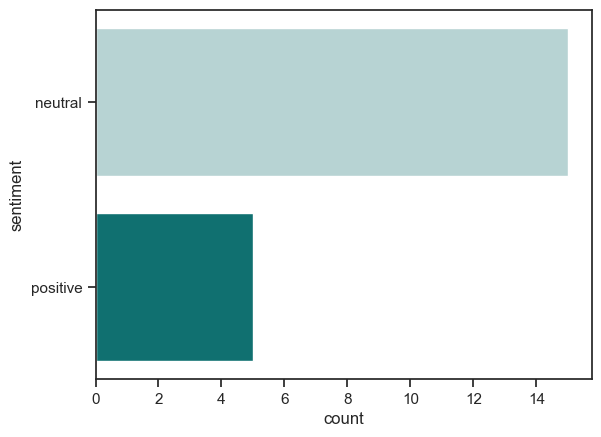

In [167]:
sns.countplot(y='sentiment', 
             data=df_6, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

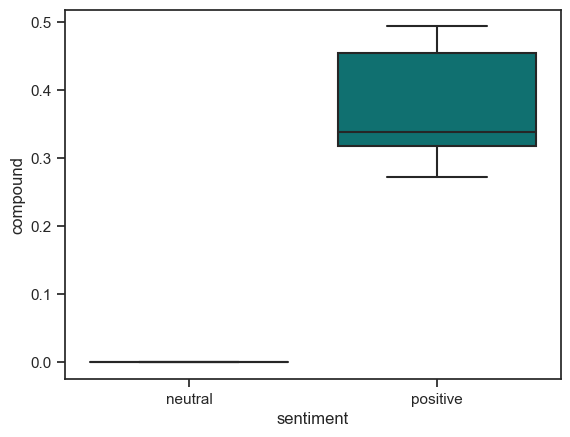

In [168]:
# Boxplot
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df_6);

# Appendix


In [198]:
regexp = nltk.RegexpTokenizer(r'(?:\[[^][]*]|\s)+', gaps=True)
(
    df
    [0:1]
    .assign(
        text = lambda x: x.review.str.lower(),
        text_token = lambda x: x['text'].apply(regexp.tokenize),
        text_token_stop = lambda x: 
            x['text_token']
            .apply(
                lambda xx: [item for item in xx if item not in stopwords]),
        text_string = lambda x: 
            x['text_token_stop']
            .apply(lambda xx: ' '.join([item for item in xx if len(item) > 2])),
        text_token_lem = lambda x: x['text_string'].apply(wordnet_lem.lemmatize)            
    )
    )


,review,text,text_token,text_token_stop,text_string,text_token_lem
0,"Har betalt for deres plus abonoment, som jeg ikke har kunne benyttet fordi deres sytem (app og hjemmesid) ikke er optimeret ordentligt. Har betalt for 20 dage uden grund, og kundeservice hjælper ikke på nogen måder. Dårlig kundeservice, især hvis i ville have jeres kunder til at fortsætte på jeres abonoment system.","har betalt for deres plus abonoment, som jeg ikke har kunne benyttet fordi deres sytem (app og hjemmesid) ikke er optimeret ordentligt. har betalt for 20 dage uden grund, og kundeservice hjælper ikke på nogen måder. dårlig kundeservice, især hvis i ville have jeres kunder til at fortsætte på jeres abonoment system.","[har, betalt, for, deres, plus, abonoment,, som, jeg, ikke, har, kunne, benyttet, fordi, deres, sytem, (app, og, hjemmesid), ikke, er, optimeret, ordentligt., har, betalt, for, 20, dage, uden, grund,, og, kundeservice, hjælper, ikke, på, nogen, måder., dårlig, kundeservice,, især, hvis, i, ville, have, jeres, kunder, til, at, fortsætte, på, jeres, abonoment, system.]","[betalt, plus, abonoment,, benyttet, sytem, (app, hjemmesid), optimeret, ordentligt., betalt, 20, dage, uden, grund,, kundeservice, hjælper, nogen, måder., dårlig, kundeservice,, især, kunder, fortsætte, abonoment, system.]","betalt plus abonoment, benyttet sytem (app hjemmesid) optimeret ordentligt. betalt dage uden grund, kundeservice hjælper nogen måder. dårlig kundeservice, især kunder fortsætte abonoment system.","betalt plus abonoment, benyttet sytem (app hjemmesid) optimeret ordentligt. betalt dage uden grund, kundeservice hjælper nogen måder. dårlig kundeservice, især kunder fortsætte abonoment system."
